# Newick Trees Research

[Reference: Tutorial reading and writing newick trees](http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#reading-and-writing-newick-trees)

In [3]:
import pandas as pd

# Explore File

## Head

In [23]:
df = pd.read_csv('google_taxonomy.csv', dtype={'cat_num': str}) # https://support.google.com/merchants/answer/6324436?hl=en
df = df.fillna(0)
df.head(10)

,cat_num,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,1,Animals & Pet Supplies,0,0,0,0,0,0
1,3237,Animals & Pet Supplies,Live Animals,0,0,0,0,0
2,2,Animals & Pet Supplies,Pet Supplies,0,0,0,0,0
3,3,Animals & Pet Supplies,Pet Supplies,Bird Supplies,0,0,0,0
4,7385,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Cage Accessories,0,0,0
5,499954,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Cage Accessories,Bird Cage Bird Baths,0,0
6,7386,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Cage Accessories,Bird Cage Food & Water Dishes,0,0
7,4989,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Cages & Stands,0,0,0
8,4990,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Food,0,0,0
9,7398,Animals & Pet Supplies,Pet Supplies,Bird Supplies,Bird Gyms & Playstands,0,0,0


## Summary Statistics

In [24]:
df.describe(include='all').T.fillna('-')

,count,unique,top,freq
cat_num,5582,5582,2620,1
cat_1,5582,21,Home & Garden,1035
cat_2,5582,193,Outdoor Recreation,459
cat_3,5582,1350,0,213
cat_4,5582,2199,0,1562
cat_5,5582,1378,0,3760
cat_6,5582,398,0,5137
cat_7,5582,49,0,5534


## Unique List of Category Level 1

In [25]:
df['cat_1'].unique()

array(['Animals & Pet Supplies', 'Apparel & Accessories',
       'Arts & Entertainment', 'Baby & Toddler', 'Business & Industrial',
       'Cameras & Optics', 'Electronics', 'Food, Beverages & Tobacco',
       'Furniture', 'Hardware', 'Health & Beauty', 'Home & Garden',
       'Luggage & Bags', 'Mature', 'Media', 'Office Supplies',
       'Religious & Ceremonial', 'Software', 'Sporting Goods',
       'Toys & Games', 'Vehicles & Parts'], dtype=object)

# Food, Beverages & Tobacco 

Trim to food n beverages so that the tree would not be so big.

In [9]:
df = df[df['cat_1'] == 'Food, Beverages & Tobacco']

In [12]:
df.describe(include='all').T.fillna('-')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cat_num,364.0,-,-,-,66167,166560,136,5092.25,6586.5,6726.25,543652
cat_1,364.0,1,"Food, Beverages & Tobacco",364,-,-,-,-,-,-,-
cat_2,364.0,4,Food Items,312,-,-,-,-,-,-,-
cat_3,364.0,41,Fruits & Vegetables,136,-,-,-,-,-,-,-
cat_4,364.0,164,Fresh & Frozen Vegetables,71,-,-,-,-,-,-,-
cat_5,364.0,131,0,207,-,-,-,-,-,-,-
cat_6,364.0,28,0,337,-,-,-,-,-,-,-
cat_7,364.0,1,0,364,-,-,-,-,-,-,-


## Filter the dataset

In [14]:
cat_1_df = df[df['cat_2'] == 0]
cat_2_df = df[(df['cat_2'] != 0) & (df['cat_3'] == 0)]
cat_3_df = df[(df['cat_2'] != 0) & (df['cat_3'] != 0) & (df['cat_4'] == 0)]
cat_4_df = df[(df['cat_2'] != 0) & (df['cat_3'] != 0) & (df['cat_4'] != 0) & (df['cat_5'] == 0)]
cat_5_df = df[(df['cat_2'] != 0) & (df['cat_3'] != 0) & (df['cat_4'] != 0) & (df['cat_5'] != 0) & (df['cat_6'] == 0)]
cat_6_df = df[(df['cat_2'] != 0) & (df['cat_3'] != 0) & (df['cat_4'] != 0) & (df['cat_5'] != 0) & (df['cat_6'] != 0) & (df['cat_7'] == 0)]
cat_7_df = df[(df['cat_2'] != 0) & (df['cat_3'] != 0) & (df['cat_4'] != 0) & (df['cat_5'] != 0) & (df['cat_6'] != 0) & (df['cat_7'] != 0)]

In [15]:
root_category = 'root'

In [16]:
cat_1_lst = [[root_category, x] for x in list(cat_1_df['cat_1'])]

cat_2_df = cat_2_df[['cat_1', 'cat_2']]
cat_3_df = cat_3_df[['cat_2', 'cat_3']]
cat_4_df = cat_4_df[['cat_3', 'cat_4']]
cat_5_df = cat_5_df[['cat_4', 'cat_5']]
cat_6_df = cat_6_df[['cat_5', 'cat_6']]
cat_7_df = cat_7_df[['cat_6', 'cat_7']]

cat_2_lst = cat_2_df.values.tolist()
cat_3_lst = cat_3_df.values.tolist()
cat_4_lst = cat_4_df.values.tolist()
cat_5_lst = cat_5_df.values.tolist()
cat_6_lst = cat_6_df.values.tolist()
cat_7_lst = cat_7_df.values.tolist()


In [19]:
root_lst = [[-1, 'root']]
teir_lst = [
    root_lst, 
    cat_1_lst, cat_2_lst, 
    cat_3_lst, cat_4_lst,
    cat_5_lst, cat_6_lst,
    cat_7_lst
]
flat_list = [item for sublist in teir_lst for item in sublist]

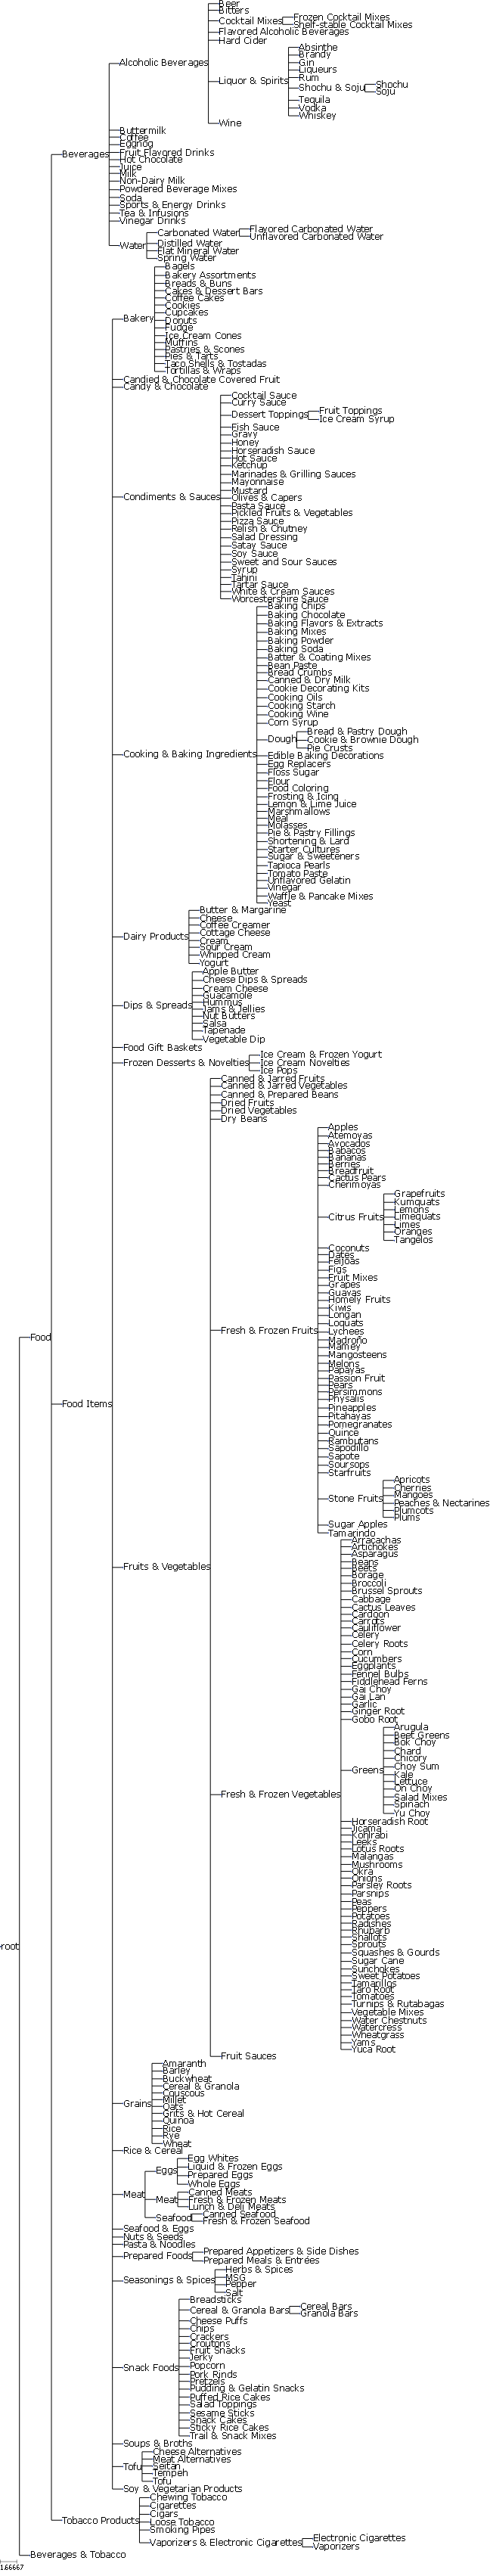

In [20]:
# https://stackoverflow.com/questions/51450526/tree-structure-in-python-using-csv-data

from ete3 import Tree, TreeStyle, TextFace, add_face_to_node
from collections import defaultdict

def build_tree(nodes):
    root = None
    for i in nodes:
        if i[0] == -1:
            root = i
    if not root:
        raise ValueError('no root!')
    data = defaultdict(list)
    for i in nodes:
        if i[0] != -1:
            data[i[1]] = []
            data[i[0]].append(i[1])
    return data, root[1]

def dict_tree_to_str(tree, root):
    if not tree[root]:
        return f'{root}'
    subtrees = [dict_tree_to_str(tree, st) for st in tree[root]]
    return f'({",".join(subtrees)}){root}'

tree_csv = flat_list

tree_dict, root = build_tree(tree_csv)
t = Tree(dict_tree_to_str(tree_dict, root) + ';',  format=1)

ts = TreeStyle()
ts.show_leaf_name = False

def my_layout(node): # https://github.com/etetoolkit/ete/issues/219
    F = TextFace(node.name, tight_text=True)
    add_face_to_node(F, node, column=0, position="branch-right")
ts.layout_fn = my_layout
# ts.scale =  120 # 120 pixels per branch length unit
# ts.rotation = 90
# ts.mode = "c"
# ts.arc_start = -180 # 0 degrees = 3 o'clock
# ts.arc_span = 180

t.render("%%inline", w=183, units="mm", tree_style=ts)

# t.render("google_taxonomy_food.png", w=183, units="mm", tree_style=ts)

# t.show(tree_style=ts)